#      Machine Learning to predict District/School Performance

1. **Packages** - sklearn, pandas, numpy, matplotlib, seaborn
2. **Datasource** - 2017 ELA and MATH data from California Department of Education website
3. **Classification Models** - Logistic Regression, Random Forest, Stochastic Gradient Descent
4. **Dashboard** - Tableau 

## 1) Import Packages

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

## 2) Load Dataset

In [2]:

ela1 = pd.read_csv(os.path.join('/Users/sesamuel/Documents/Proj3/StudentAnalytics/csv/ela38download2017f.csv'))                     
math1 = pd.read_csv(os.path.join('/Users/sesamuel/Documents/Proj3/StudentAnalytics/csv/math38download2017f.csv'))                     

In [3]:
ela1.shape

(121959, 25)

In [4]:
ela1.head(2)


,cds,rtype,schoolname,districtname,countyname,charter_flag,coe_flag,studentgroup,currdenom,currstatus,...,color,box,caa_denom,caa_level1_num,caa_level1_pct,caa_level2_num,caa_level2_pct,caa_level3_num,caa_level3_pct,reportingyear
0,1100170123968,S,Community School for Creative Education,Alameda County Office of Education,Alameda,Y,NaN,AA,12,-131.2,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017f
1,1100170123968,S,Community School for Creative Education,Alameda County Office of Education,Alameda,Y,NaN,AI,2,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017f


In [5]:
math1.shape

(121910, 25)

## 3) Data Preparation prior to train , test split

In [6]:
ela1.columns

Index(['cds', 'rtype', 'schoolname', 'districtname', 'countyname',
       'charter_flag', 'coe_flag', 'studentgroup', 'currdenom', 'currstatus',
       'priordenom', 'priorstatus', 'change', 'statuslevel', 'changelevel',
       'color', 'box', 'caa_denom', 'caa_level1_num', 'caa_level1_pct',
       'caa_level2_num', 'caa_level2_pct', 'caa_level3_num', 'caa_level3_pct',
       'reportingyear'],
      dtype='object')

In [7]:
ela1.dtypes

cds                 int64
rtype              object
schoolname         object
districtname       object
countyname         object
charter_flag       object
coe_flag          float64
studentgroup       object
currdenom           int64
currstatus        float64
priordenom          int64
priorstatus       float64
change            float64
statuslevel         int64
changelevel         int64
color               int64
box                 int64
caa_denom         float64
caa_level1_num    float64
caa_level1_pct    float64
caa_level2_num    float64
caa_level2_pct    float64
caa_level3_num    float64
caa_level3_pct    float64
reportingyear      object
dtype: object

In [8]:
math1.columns

Index(['cds', 'rtype', 'schoolname', 'districtname', 'countyname',
       'charter_flag', 'coe_flag', 'studentgroup', 'currdenom', 'currstatus',
       'priordenom', 'priorstatus', 'change', 'statuslevel', 'changelevel',
       'color', 'box', 'caa_denom', 'caa_level1_num', 'caa_level1_pct',
       'caa_level2_num', 'caa_level2_pct', 'caa_level3_num', 'caa_level3_pct',
       'reportingyear'],
      dtype='object')

In [9]:
 # Merge the two DataFrames together based on the cds they share
acadperft = pd.merge(ela1, math1, on="cds")
acadperft.head()

,cds,rtype_x,schoolname_x,districtname_x,countyname_x,charter_flag_x,coe_flag_x,studentgroup_x,currdenom_x,currstatus_x,...,color_y,box_y,caa_denom_y,caa_level1_num_y,caa_level1_pct_y,caa_level2_num_y,caa_level2_pct_y,caa_level3_num_y,caa_level3_pct_y,reportingyear_y
0,1100170123968,S,Community School for Creative Education,Alameda County Office of Education,Alameda,Y,NaN,AA,12,-131.2,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017f
1,1100170123968,S,Community School for Creative Education,Alameda County Office of Education,Alameda,Y,NaN,AA,12,-131.2,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017f
2,1100170123968,S,Community School for Creative Education,Alameda County Office of Education,Alameda,Y,NaN,AA,12,-131.2,...,2,180,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017f
3,1100170123968,S,Community School for Creative Education,Alameda County Office of Education,Alameda,Y,NaN,AA,12,-131.2,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017f
4,1100170123968,S,Community School for Creative Education,Alameda County Office of Education,Alameda,Y,NaN,AA,12,-131.2,...,3,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017f


In [10]:
acadperft.shape

(1805242, 49)

In [11]:
# Extract 
acadperfte_df = acadperft.loc[:, ["cds", "schoolname_x", "districtname_x","countyname_x","studentgroup_x",
                 "statuslevel_x","changelevel_x", "color_x", "box_x",
"schoolname_y", "districtname_y","countyname_y","studentgroup_y",
                 "statuslevel_y","changelevel_y", "color_y", "box_y"]]
acadperfte_df.head()

,cds,schoolname_x,districtname_x,countyname_x,studentgroup_x,statuslevel_x,changelevel_x,color_x,box_x,schoolname_y,districtname_y,countyname_y,studentgroup_y,statuslevel_y,changelevel_y,color_y,box_y
0,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,2,5,0,0
1,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,Community School for Creative Education,Alameda County Office of Education,Alameda,AI,0,0,0,0
2,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,Community School for Creative Education,Alameda County Office of Education,Alameda,ALL,2,3,2,180
3,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,Community School for Creative Education,Alameda County Office of Education,Alameda,AS,0,0,0,0
4,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,Community School for Creative Education,Alameda County Office of Education,Alameda,EL,2,5,3,200


In [12]:
# Rename columns so that they are differentiated
acadperfte_df= acadperfte_df.rename(columns={"schoolname_x": "ELA_Schoolname", "districtname_x": "ELA_Districtname", "countyname_x": "ELA_Countyname",
            "studentgroup_x": "ELA_Studentgroup", "statuslevel_x": "ELA_Statuslevel", "changelevel_x": "ELA_Changelevel",
            "color_x": "ELA_Color", "box_x": "ELA_Box"})

acadperfte_df = acadperfte_df.rename(columns={"schoolname_y": "MATH_Schoolname", "districtname_y": "MATH_Districtname", "countyname_y": "MATH_Countyname",
            "studentgroup_y": "MATH_Studentgroup", "statuslevel_y": "MATH_Statuslevel", "changelevel_y": "MATH_Changelevel",
            "color_y": "MATH_Color", "box_y": "MATH_Box"})

acadperfte_df.columns

Index(['cds', 'ELA_Schoolname', 'ELA_Districtname', 'ELA_Countyname',
       'ELA_Studentgroup', 'ELA_Statuslevel', 'ELA_Changelevel', 'ELA_Color',
       'ELA_Box', 'MATH_Schoolname', 'MATH_Districtname', 'MATH_Countyname',
       'MATH_Studentgroup', 'MATH_Statuslevel', 'MATH_Changelevel',
       'MATH_Color', 'MATH_Box'],
      dtype='object')

In [13]:
acadperfte_df.dtypes

cds                   int64
ELA_Schoolname       object
ELA_Districtname     object
ELA_Countyname       object
ELA_Studentgroup     object
ELA_Statuslevel       int64
ELA_Changelevel       int64
ELA_Color             int64
ELA_Box               int64
MATH_Schoolname      object
MATH_Districtname    object
MATH_Countyname      object
MATH_Studentgroup    object
MATH_Statuslevel      int64
MATH_Changelevel      int64
MATH_Color            int64
MATH_Box              int64
dtype: object

## 3a) Create a variable  - perf  
Better the color better the perf

                                 Keycode for ELA_Color 
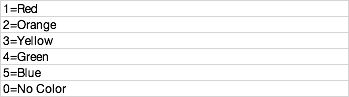

In [14]:
# Create a categorical label from Color # Good:15~20 Fair:10~14 Poor:0~9
acadperfte_df['perf'] = 'na'
acadperfte_df.loc[(acadperfte_df.ELA_Color >= 4) , 'perf'] = 'High' 
acadperfte_df.loc[(acadperfte_df.ELA_Color >= 3) & (acadperfte_df.ELA_Color < 4) , 'perf'] = 'Mid' 
acadperfte_df.loc[(acadperfte_df.ELA_Color >= 0) & (acadperfte_df.ELA_Color <= 2) , 'perf'] = 'Low' 
acadperfte_df.loc[(acadperfte_df.MATH_Color >= 4) , 'perf'] = 'High' 
acadperfte_df.loc[(acadperfte_df.MATH_Color >= 3) & (acadperfte_df.MATH_Color < 4) , 'perf'] = 'Mid' 
acadperfte_df.loc[(acadperfte_df.MATH_Color >= 0) & (acadperfte_df.MATH_Color <= 2) , 'perf'] = 'Low' 
acadperfte_df.head(2)

,cds,ELA_Schoolname,ELA_Districtname,ELA_Countyname,ELA_Studentgroup,ELA_Statuslevel,ELA_Changelevel,ELA_Color,ELA_Box,MATH_Schoolname,MATH_Districtname,MATH_Countyname,MATH_Studentgroup,MATH_Statuslevel,MATH_Changelevel,MATH_Color,MATH_Box,perf
0,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,2,5,0,0,Low
1,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,Community School for Creative Education,Alameda County Office of Education,Alameda,AI,0,0,0,0,Low


In [15]:
acadperfte_df['ELA_Color'].value_counts()

0    1132111
2     256645
3     150987
4     124966
1      88064
5      52469
Name: ELA_Color, dtype: int64

In [16]:
acadperfte_df['MATH_Color'].value_counts()

0    1132690
2     241446
3     176773
4     120905
1      76286
5      57142
Name: MATH_Color, dtype: int64

## 3b) Handling Missing values

In [17]:
# look for missing values
acadperfte_df.isnull().any()

cds                  False
ELA_Schoolname        True
ELA_Districtname     False
ELA_Countyname       False
ELA_Studentgroup     False
ELA_Statuslevel      False
ELA_Changelevel      False
ELA_Color            False
ELA_Box              False
MATH_Schoolname       True
MATH_Districtname    False
MATH_Countyname      False
MATH_Studentgroup    False
MATH_Statuslevel     False
MATH_Changelevel     False
MATH_Color           False
MATH_Box             False
perf                 False
dtype: bool

In [18]:
acadperfte_df.shape

(1805242, 18)

In [19]:
# making new data frame with dropped NA values 
new_datat1 = acadperfte_df.dropna(axis = 0, how ='any')

In [20]:
new_datat1.shape

(1614245, 18)

In [21]:
new_datat1['ELA_Color'].value_counts()

0    1036147
2     217477
3     131688
4     107171
1      76589
5      45173
Name: ELA_Color, dtype: int64

## 4)Exploratory Data Analysis

### 4a)Visually analysing ELA_Color distribution

                                 Keycode for ELA_Color 
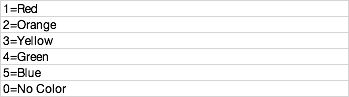

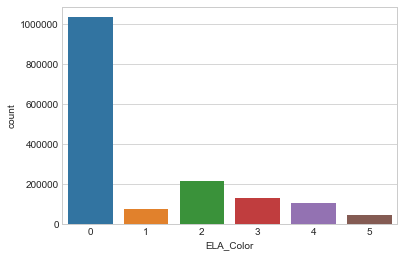

In [22]:
sns.countplot(x="ELA_Color", data=new_datat1)

In [23]:
#High number of Color=0 due to no data and could give  poor outcome .
#Hence lets work with those that have data 
new_datat2=new_datat1[new_datat1.ELA_Color != 0]
new_datat2['ELA_Color'].value_counts()

2    217477
3    131688
4    107171
1     76589
5     45173
Name: ELA_Color, dtype: int64

## <font color=blue>Googled "top public elementary school and <font color=magenta>Bonita Canyon</font> popped up!"   -        So let's find out if my plot will display accordingly</font>


In [24]:
new_datatz=new_datat2[new_datat2.ELA_Schoolname == 'Bonita Canyon Elementary']

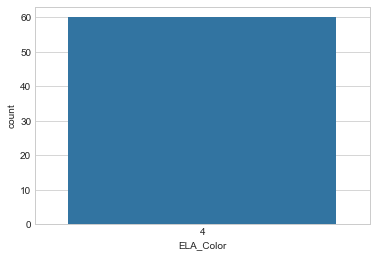

In [25]:
sns.countplot(x="ELA_Color", data=new_datatz)

## <font color=green>"4" means being in the second top color code category for ELA!  So plot is ok....let's move on!</font>

                                 Keycode for ELA_Color 
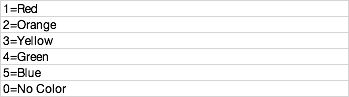

In [26]:
new_datat1['MATH_Color'].value_counts()

0    1036651
2     202442
3     153937
4     105092
1      66475
5      49648
Name: MATH_Color, dtype: int64

In [27]:
#Do the same for Math , selecting rest
new_datat2=new_datat1[new_datat1.MATH_Color != 0]
new_datat2['MATH_Color'].value_counts()

2    202442
3    153937
4    105092
1     66475
5     49648
Name: MATH_Color, dtype: int64

In [28]:
# making new data frame with dropped NA values 
# look for missing values
new_datat2.isnull().any()

cds                  False
ELA_Schoolname       False
ELA_Districtname     False
ELA_Countyname       False
ELA_Studentgroup     False
ELA_Statuslevel      False
ELA_Changelevel      False
ELA_Color            False
ELA_Box              False
MATH_Schoolname      False
MATH_Districtname    False
MATH_Countyname      False
MATH_Studentgroup    False
MATH_Statuslevel     False
MATH_Changelevel     False
MATH_Color           False
MATH_Box             False
perf                 False
dtype: bool

### <font color=green>Nice! No missing values </font>

In [29]:
new_datat2.shape

(577594, 18)

## <font color=blue>Oh wait, how did our test school look for Math?</font>

In [30]:
new_datatzm=new_datat2[new_datat2.MATH_Schoolname == 'Bonita Canyon Elementary']

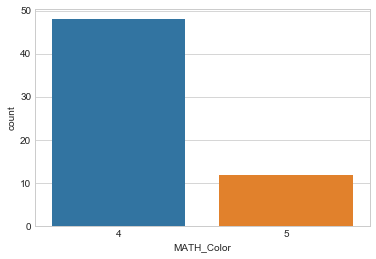

In [31]:
sns.countplot(x="MATH_Color", data=new_datatzm)

### <font color=green>Wow! It has a "4" and "5" and nothing lower !!! !  So far so good! ....let's move on!</font>

## 4b)Use Matplotlib to identify the correlation between variables through a correlation heatmap

Text(0.5,1,'Correlation Heatmap')

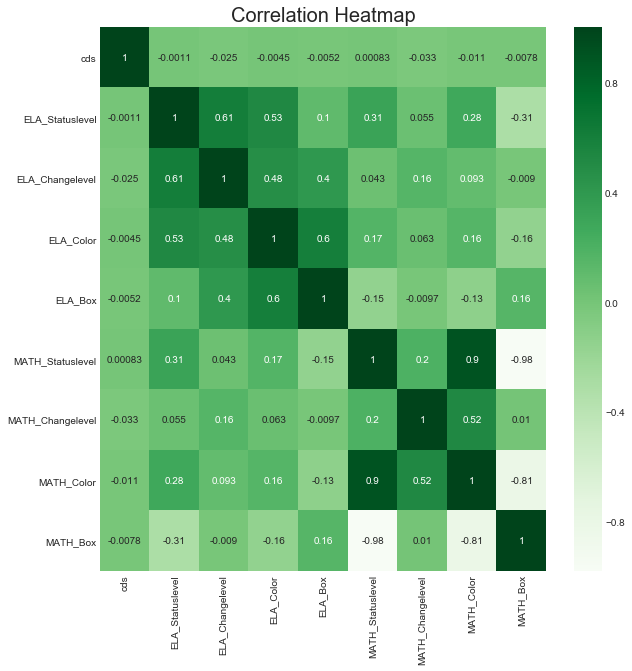

In [32]:
 corr = new_datat2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Greens")
plt.title('Correlation Heatmap', fontsize=20)

### <font color=green>Here are some quick observations
1. ELA_Color has a **higher correlation** with **ELA_Statuslevel - 0.53** followed by **ELA_Changelevel**
2. MATH_Color has a **higher correlation** with **MATH_Statuslevel - 0.9** followed by **ELA_Changelevel at 0.5**
3. As you move from left to right from ELA_Color , the **MATH_** correlation decreases . 
4. As you move from left to right from MATH_Color , the **ELA_** correlation decreases . 
    * This could also be because different score ranges are applied to evaluate ELA and Math performance.</font> ![Ref](Table9_ScoreRange.png)
    

In [33]:
#Create a categorical label from Color 
new_datat2['label'] = 'no'
new_datat2.loc[(new_datat2.perf != 'Low') , 'label'] = 'yes'  
new_datat2.head(2)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,cds,ELA_Schoolname,ELA_Districtname,ELA_Countyname,ELA_Studentgroup,ELA_Statuslevel,ELA_Changelevel,ELA_Color,ELA_Box,MATH_Schoolname,MATH_Districtname,MATH_Countyname,MATH_Studentgroup,MATH_Statuslevel,MATH_Changelevel,MATH_Color,MATH_Box,perf,label
2,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,Community School for Creative Education,Alameda County Office of Education,Alameda,ALL,2,3,2,180,Low,no
4,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,Community School for Creative Education,Alameda County Office of Education,Alameda,EL,2,5,3,200,Mid,yes


In [34]:
# Create a categorical label from Color  - perf_flg
#0/1 - perfflg - ignore
#new_datat2['perfflg'] = 0
#new_datat2.loc[(new_datat2.perf != 'Low') , 'perfflg'] = 1 
#new_datat2.head(2)
new_datat2['label'].str.contains('yes').head()

2     False
4      True
8     False
11     True
16    False
Name: label, dtype: bool

In [35]:
#before getting binary outcome for perfflg
new_datat2.dtypes

cds                   int64
ELA_Schoolname       object
ELA_Districtname     object
ELA_Countyname       object
ELA_Studentgroup     object
ELA_Statuslevel       int64
ELA_Changelevel       int64
ELA_Color             int64
ELA_Box               int64
MATH_Schoolname      object
MATH_Districtname    object
MATH_Countyname      object
MATH_Studentgroup    object
MATH_Statuslevel      int64
MATH_Changelevel      int64
MATH_Color            int64
MATH_Box              int64
perf                 object
label                object
dtype: object

## 5a)Check Overall Performance again using matplotlib 

Text(0,0.5,'Number of Schools')

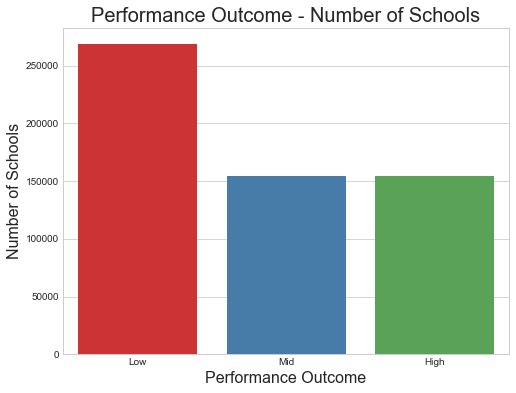

In [36]:
# Performance Outcome Countplot - Schools   -IGNORE
plt.figure(figsize=(8,6))
sns.countplot(new_datat2.perf, order=["Low","Mid","High"], palette='Set1')
plt.title('Performance Outcome - Number of Schools',fontsize=20)
plt.xlabel('Performance Outcome', fontsize=16)
plt.ylabel('Number of Schools', fontsize=16)

 ## <font color=blue> This is on overall data that has all County, Districts, School info  and it shows overall low performance.This may indicate our education system need to improve . </font>
   <b> - Let's get to a more granular level- district/school/student group </b>

In [37]:
#Selecting district1
district1=new_datat2[new_datat2.ELA_Districtname == 'Capistrano Unified']
district1['ELA_Districtname'].value_counts()

Capistrano Unified    4480
Name: ELA_Districtname, dtype: int64

In [38]:
#unique values in a coulmn
dist1_unq=district1['ELA_Districtname'].nunique()
dist1_unq

1

In [39]:
#count distinct values in single column
dist1sch_cnt=district1['ELA_Schoolname'].nunique()
dist1sch_cnt

51

In [40]:
#Show the list of District1 schools
D1_Schools = district1['ELA_Schoolname'].unique()
D1_Schools.sort()
D1_Schools

array(['Aliso Viejo Middle', 'Arroyo Vista Elementary',
       'Arroyo Vista Middle', 'Bathgate Elementary',
       'Bernice Ayer Middle', 'Canyon Vista Elementary',
       'Capistrano Connections Academy', 'Capistrano Virtual/Home',
       'Carl Hankey Elementary', 'Carl Hankey Middle',
       'Castille Elementary', 'Chaparral Elementary',
       'Clarence Lobo Elementary', 'Community Roots Academy',
       'Concordia Elementary', 'Del Obispo Elementary',
       'Don Juan Avila Elementary', 'Don Juan Avila Middle',
       'George White Elementary', 'Harold Ambuehl Elementary',
       'Hidden Hills Elementary', 'John Malcom Elementary', 'Journey',
       'Kinoshita Elementary', 'Ladera Ranch Elementary',
       'Ladera Ranch Middle', 'Laguna Niguel Elementary',
       'Las Flores Elementary', 'Las Flores Middle',
       'Las Palmas Elementary', 'Marblehead Elementary',
       'Marco Forster Middle', 'Marian Bergeson Elementary',
       'Moulton Elementary', 'Newhart Middle', 'Niguel Hi

Text(0,0.5,'District1')

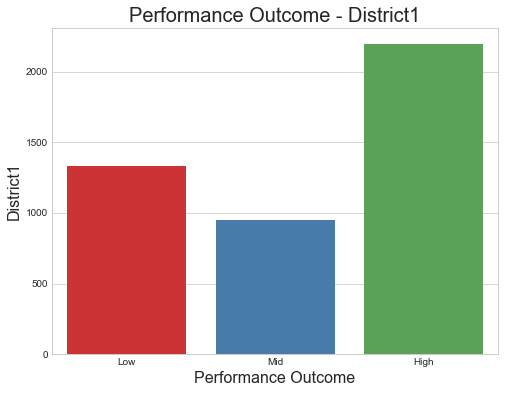

In [41]:
# ELA Performance Outcome Countplot - District1
plt.figure(figsize=(8,6))
sns.countplot(district1.perf, order=["Low","Mid","High"], palette='Set1')
plt.title('Performance Outcome - District1',fontsize=20)
plt.xlabel('Performance Outcome', fontsize=16)
plt.ylabel('District1', fontsize=16)

### <font color=green> In spite of overall low performance, when we look at specific school it showed high performance </font> <font color=red>followed by higher low performance noted. So watch out for that! </font>

## 5b)Check ELA performance for a another specific district 

In [42]:
#District2 - Irvine Unified
district2=new_datat2[new_datat2.ELA_Districtname == 'Irvine Unified']
district2['ELA_Districtname'].value_counts()

Irvine Unified    3229
Name: ELA_Districtname, dtype: int64

Text(0,0.5,'District2')

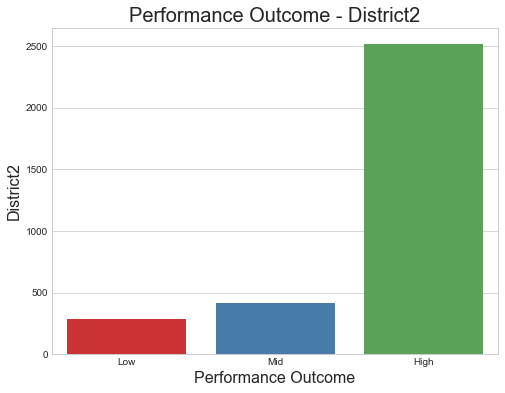

In [43]:
# ELA Performance Outcome Countplot - District2
plt.figure(figsize=(8,6))
sns.countplot(district2.perf, order=["Low","Mid","High"], palette='Set1')
plt.title('Performance Outcome - District2',fontsize=20)
plt.xlabel('Performance Outcome', fontsize=16)
plt.ylabel('District2', fontsize=16)

### <font color=green> From above figure district2 is exceptionally good! Expected that right! </font>

# 5c)Check ELA for a specific school

In [44]:
school1=new_datat2[new_datat2.ELA_Schoolname == 'Wood Canyon Elementary']
school1['ELA_Schoolname'].value_counts()

Wood Canyon Elementary    84
Name: ELA_Schoolname, dtype: int64

Text(0,0.5,'School1')

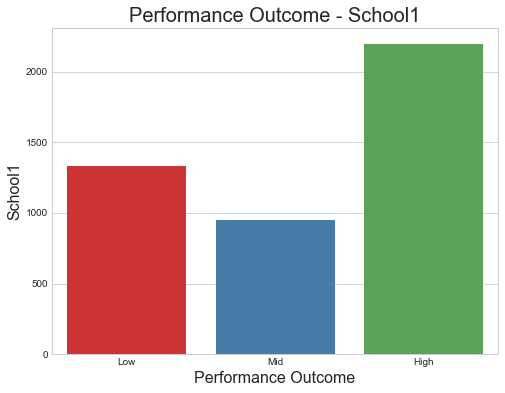

In [45]:
# ELA Performance Outcome Countplot - School1
plt.figure(figsize=(8,6))
sns.countplot(district1.perf, order=["Low","Mid","High"], palette='Set1')
plt.title('Performance Outcome - School1',fontsize=20)
plt.xlabel('Performance Outcome', fontsize=16)
plt.ylabel('School1', fontsize=16)

## 5d)Check ELA performance under specific student group

ALL=All Students
AA=Black/African American
AI=American Indian or Alaska Native
AS=Asian
FI=Filipino
HI=Hispanic
PI=Pacific Islander
WH=White
MR=Multiple Races/Two or More
EL=English Learner
ELO=English Learners Only RFP=RFEPs Only 
EO=English Only
SED=Socioeconomically Disadvantaged
SWD=Students with Disabilities
FOS=Foster Youth
HOM=Homeless Youth

In [46]:
stdgrp_array = ['HOM', 'FOS']
stdgrp1=new_datat2.loc[new_datat2['ELA_Studentgroup'].isin(stdgrp_array)]
#stdgrp1=new_datat2[new_datat2.ELA_Studentgroup == 'EL']
stdgrp1['ELA_Studentgroup'].value_counts()

HOM    30696
FOS    25989
Name: ELA_Studentgroup, dtype: int64

In [47]:
perc = (lambda col: col/col.sum())
index = ['Low','Mid','High']
stdgrp_tab1 = pd.crosstab(index=stdgrp1.perf, columns=stdgrp1.ELA_Studentgroup)
stdgrp_tab = np.log(stdgrp_tab1)
stdgrp_perc = stdgrp_tab.apply(perc).reindex(index)

<Figure size 432x288 with 0 Axes>

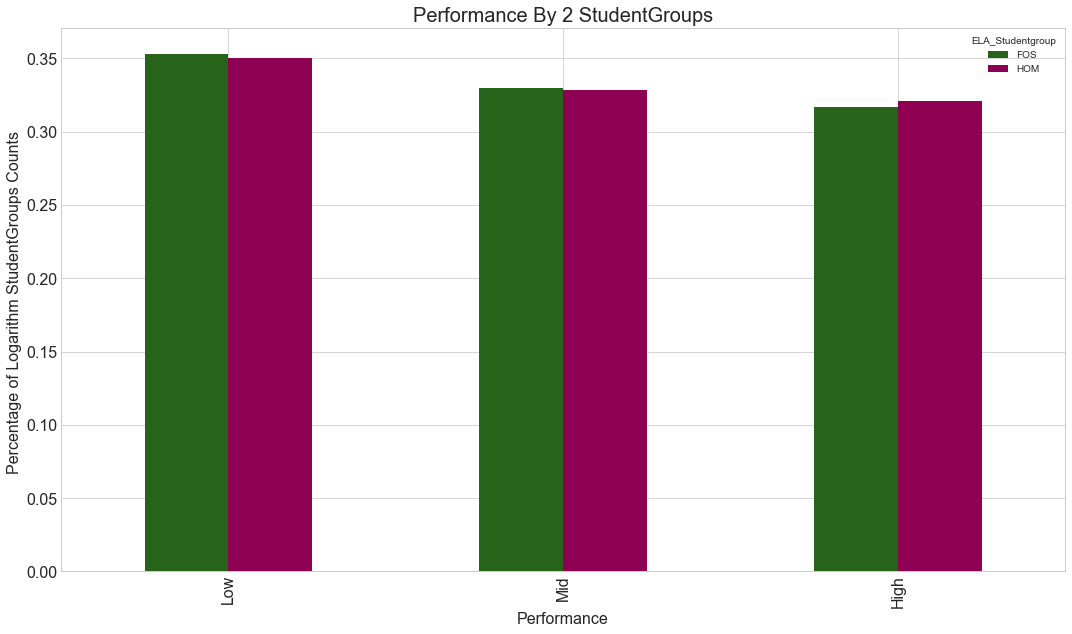

In [48]:
plt.figure()
stdgrp_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(18,10))
plt.title('Performance By 2 StudentGroups', fontsize=20)
plt.ylabel('Percentage of Logarithm StudentGroups Counts ', fontsize=16)
plt.xlabel('Performance', fontsize=16)
plt.show()

## 6)Assign X (data) and y (target)

In [49]:
new_datat2.head(2)
#IGNORE perfflg
#USE perf_flg

,cds,ELA_Schoolname,ELA_Districtname,ELA_Countyname,ELA_Studentgroup,ELA_Statuslevel,ELA_Changelevel,ELA_Color,ELA_Box,MATH_Schoolname,MATH_Districtname,MATH_Countyname,MATH_Studentgroup,MATH_Statuslevel,MATH_Changelevel,MATH_Color,MATH_Box,perf,label
2,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,Community School for Creative Education,Alameda County Office of Education,Alameda,ALL,2,3,2,180,Low,no
4,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,Community School for Creative Education,Alameda County Office of Education,Alameda,EL,2,5,3,200,Mid,yes


In [50]:
new_datat2.dtypes

cds                   int64
ELA_Schoolname       object
ELA_Districtname     object
ELA_Countyname       object
ELA_Studentgroup     object
ELA_Statuslevel       int64
ELA_Changelevel       int64
ELA_Color             int64
ELA_Box               int64
MATH_Schoolname      object
MATH_Districtname    object
MATH_Countyname      object
MATH_Studentgroup    object
MATH_Statuslevel      int64
MATH_Changelevel      int64
MATH_Color            int64
MATH_Box              int64
perf                 object
label                object
dtype: object

<B> IGNORELogistic regression gives binary outcome - already converted perf_flg to binary value
since above type shows object again then convert again</B>


<B> Logistic regression gives binary outcome - convert target variable "label" to binary value</B>


In [51]:
new_datat2['label'].str.contains('yes').astype(int).head()


2     0
4     1
8     0
11    1
16    0
Name: label, dtype: int64

### 6a)Assign the X data  - predictor /independent variables

In [52]:

X = new_datat2[["cds", "ELA_Statuslevel", "ELA_Changelevel", 
        "ELA_Color", "ELA_Box", "MATH_Statuslevel", "MATH_Changelevel", "MATH_Color", 
        "MATH_Box", "perf"]]
X.head(5)

,cds,ELA_Statuslevel,ELA_Changelevel,ELA_Color,ELA_Box,MATH_Statuslevel,MATH_Changelevel,MATH_Color,MATH_Box,perf
2,1100170123968,1,1,0,0,2,3,2,180,Low
4,1100170123968,1,1,0,0,2,5,3,200,Mid
8,1100170123968,1,1,0,0,2,3,2,180,Low
11,1100170123968,1,1,0,0,2,4,3,190,Mid
16,1100170123968,0,0,0,0,2,3,2,180,Low


In [53]:
X.dtypes

cds                  int64
ELA_Statuslevel      int64
ELA_Changelevel      int64
ELA_Color            int64
ELA_Box              int64
MATH_Statuslevel     int64
MATH_Changelevel     int64
MATH_Color           int64
MATH_Box             int64
perf                object
dtype: object

In [54]:
X.shape

(577594, 10)

In [55]:
# convert all columns of DataFrame
#X=pd.to_numeric(X)
#X
X = pd.get_dummies(X)
X.dtypes


cds                 int64
ELA_Statuslevel     int64
ELA_Changelevel     int64
ELA_Color           int64
ELA_Box             int64
MATH_Statuslevel    int64
MATH_Changelevel    int64
MATH_Color          int64
MATH_Box            int64
perf_High           uint8
perf_Low            uint8
perf_Mid            uint8
dtype: object

In [56]:
X.head()

,cds,ELA_Statuslevel,ELA_Changelevel,ELA_Color,ELA_Box,MATH_Statuslevel,MATH_Changelevel,MATH_Color,MATH_Box,perf_High,perf_Low,perf_Mid
2,1100170123968,1,1,0,0,2,3,2,180,0,1,0
4,1100170123968,1,1,0,0,2,5,3,200,0,0,1
8,1100170123968,1,1,0,0,2,3,2,180,0,1,0
11,1100170123968,1,1,0,0,2,4,3,190,0,0,1
16,1100170123968,0,0,0,0,2,3,2,180,0,1,0


### 6b)Assign the y data  - target/ outcome /dependent variable

In [57]:
y = new_datat2['label'].str.contains('yes').astype(int)
y.head(5)

2     0
4     1
8     0
11    1
16    0
Name: label, dtype: int64

In [58]:
y.shape

(577594,)

## 7) Next create Train and Test split data  

### <b>Build model on training data ,   Predict on testing data </b>

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

## 8) Create a Logistic Regression Model

In [60]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### <b> 8a-Fit (train) or model using the training data <b>

In [61]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 ### <b>8b-Validate the model using the test data </b>

In [62]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.5344175255947091
Testing Data Score: 0.5344219835317419


 ## <font color=blue> Testing score is so close to Training score . This may indicate how well our Logistic Regression model learnt from the training model.</font> 
 > <font color=blue><b> However the score is at 53% . Is that low due to large dataset of 577k records?</b></font>
   <b><h3> - Let's try to see if the score gets better at a granular level- district </h3></b>

## 8) Check district level to check if it would give a better accuracy score

In [83]:
# Calculate the unique numbers in the DataFrame
ELA_allcnty_count = len(new_datat2["ELA_Countyname"].unique())
MATH_allcnty_count = len(new_datat2["MATH_Countyname"].unique())
ELA_alldist_count = len(new_datat2["ELA_Districtname"].unique())
MATH_alldist_count = len(new_datat2["MATH_Districtname"].unique())
ELA_allsch_count = len(new_datat2["ELA_Schoolname"].unique())
MATH_allsch_count = len(new_datat2["MATH_Schoolname"].unique())

In [84]:
# Place all of the data found into a summary DataFrame
summary_all = pd.DataFrame({"Tot_Unq Counties with ELA": ELA_allcnty_count,
                            "Tot_Unq Counties with MATH": [MATH_allcnty_count],
                            "Tot_Unq Districts with ELA": [ELA_alldist_count],
                              "Tot_Unq Districts with MATH": [MATH_alldist_count],
                              "Tot_Unq Schools with ELA": [ELA_allsch_count],
                              "Tot_Unq Schools with MATH": [MATH_allsch_count],})
summary_all

,Tot_Unq Counties with ELA,Tot_Unq Counties with MATH,Tot_Unq Districts with ELA,Tot_Unq Districts with MATH,Tot_Unq Schools with ELA,Tot_Unq Schools with MATH
0,58,58,856,856,6126,6126


In [90]:
# Export file as a CSV, without the Pandas index, but with the header
new_datat2.to_csv("/Users/sesamuel/Documents/Proj3/StudentAnalytics/csv/cds_ELA_MATH_output.csv", 
                  index=False, header=True)

In [85]:
#CHECK DISTRICT LEVEL FOR MORE ACCURACY

In [88]:
# Calculate the unique school  numbers of a district in the DataFrame
ELA_county_count = len(district1["ELA_Countyname"].unique())
MATH_county_count = len(district1["MATH_Countyname"].unique())
ELA_district_count = len(district1["ELA_Districtname"].unique())
MATH_district_count = len(district1["MATH_Districtname"].unique())
ELA_school_count = len(district1["ELA_Schoolname"].unique())
MATH_school_count = len(district1["MATH_Schoolname"].unique())

In [89]:
# Place all of the data found into a summary DataFrame
summary_district1 = pd.DataFrame({"Tot_Unq Counties with ELA": ELA_county_count,
                                  "Tot_Unq Counties with MATH": [MATH_county_count],
                                  "Tot_Unq Districts with ELA": [ELA_district_count],
                                "Tot_Unq Districts with MATH": [MATH_district_count],
                              "Tot_Unq Schools with ELA": [ELA_school_count],
                              "Tot_Unq Schools with MATH": [MATH_school_count],})
summary_district1

,Tot_Unq Counties with ELA,Tot_Unq Counties with MATH,Tot_Unq Districts with ELA,Tot_Unq Districts with MATH,Tot_Unq Schools with ELA,Tot_Unq Schools with MATH
0,1,1,1,1,51,51


In [91]:
# Export district file as a CSV, without the Pandas index, but with the header
district1.to_csv("/Users/sesamuel/Documents/Proj3/StudentAnalytics/csv/CUSD_ELA_MATH_output.csv", 
                  index=False, header=True)

In [92]:
# Export district file as Excel for Tableau Dashboard, 
#without the Pandas index, but with the header
district1.to_excel("/Users/sesamuel/Documents/Proj3/StudentAnalytics/csv/CUSD_ELA_MATH_output.xlsx", 
                  index=False, header=True)

### 8a)Assign the X data - predictor /independent variable

In [64]:
 
X = district1[["cds", "ELA_Statuslevel", "ELA_Changelevel", 
        "ELA_Color", "ELA_Box", "MATH_Statuslevel", "MATH_Changelevel", "MATH_Color", 
        "MATH_Box", "perf"]]
X.head(5)


,cds,ELA_Statuslevel,ELA_Changelevel,ELA_Color,ELA_Box,MATH_Statuslevel,MATH_Changelevel,MATH_Color,MATH_Box,perf
796722,30664640100735,0,0,0,0,4,2,4,70,High
796723,30664640100735,0,0,0,0,5,4,5,40,High
796728,30664640100735,0,0,0,0,2,1,2,160,Low
796730,30664640100735,0,0,0,0,4,4,4,90,High
796732,30664640100735,0,0,0,0,2,4,3,190,Mid


In [65]:
X.dtypes

cds                  int64
ELA_Statuslevel      int64
ELA_Changelevel      int64
ELA_Color            int64
ELA_Box              int64
MATH_Statuslevel     int64
MATH_Changelevel     int64
MATH_Color           int64
MATH_Box             int64
perf                object
dtype: object

In [66]:
X.shape

(4480, 10)

### 8b)Assign the y data  - target/ outcome /dependent variable

In [67]:
y = district1['label'].str.contains('yes').astype(int)
y.head(10)

796722    1
796723    1
796728    0
796730    1
796732    1
796733    1
796734    1
796736    1
796737    1
796742    0
Name: label, dtype: int64

In [68]:
y.shape

(4480,)

In [69]:
# convert all columns of DataFrame
#X=pd.to_numeric(X)
#X
X = pd.get_dummies(X)
X.dtypes

cds                 int64
ELA_Statuslevel     int64
ELA_Changelevel     int64
ELA_Color           int64
ELA_Box             int64
MATH_Statuslevel    int64
MATH_Changelevel    int64
MATH_Color          int64
MATH_Box            int64
perf_High           uint8
perf_Low            uint8
perf_Mid            uint8
dtype: object

In [70]:
X.head(5)

,cds,ELA_Statuslevel,ELA_Changelevel,ELA_Color,ELA_Box,MATH_Statuslevel,MATH_Changelevel,MATH_Color,MATH_Box,perf_High,perf_Low,perf_Mid
796722,30664640100735,0,0,0,0,4,2,4,70,1,0,0
796723,30664640100735,0,0,0,0,5,4,5,40,1,0,0
796728,30664640100735,0,0,0,0,2,1,2,160,0,1,0
796730,30664640100735,0,0,0,0,4,4,4,90,1,0,0
796732,30664640100735,0,0,0,0,2,4,3,190,0,0,1


## <b>9-Build model on training data ,   Predict on testing data - District level </b>

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

### Fit (train) or model using the training data

In [72]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### <b>Validate the model using the test data </b>

In [73]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7026785714285714
Testing Data Score: 0.7026785714285714


### <font color=blue> Testing score is same as Training score</font>. There maybe a case of overfitting here.
    


### <font color=green><b> However this time the accuracy score increased to is 70% with a smaller dataset.</b></font>

# 10) Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
#rf = RandomForestClassifier(n_estimators=10)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [75]:
X_test.columns

Index(['cds', 'ELA_Statuslevel', 'ELA_Changelevel', 'ELA_Color', 'ELA_Box',
       'MATH_Statuslevel', 'MATH_Changelevel', 'MATH_Color', 'MATH_Box',
       'perf_High', 'perf_Low', 'perf_Mid'],
      dtype='object')

In [76]:
sorted(zip(rf.feature_importances_, X_test), reverse=True)

[(0.30920033781126494, 'perf_Low'),
 (0.30147483778815454, 'MATH_Color'),
 (0.13106325909847627, 'MATH_Box'),
 (0.11374611394909548, 'MATH_Statuslevel'),
 (0.04990739454053591, 'perf_Mid'),
 (0.04648073622265334, 'MATH_Changelevel'),
 (0.04602844594189246, 'perf_High'),
 (0.0010944677576330709, 'cds'),
 (0.00039552038319292423, 'ELA_Box'),
 (0.00024393772083640479, 'ELA_Statuslevel'),
 (0.00023723773894210226, 'ELA_Changelevel'),
 (0.00012771104732262767, 'ELA_Color')]

### <font color=green> Running Random Tree model show us that the MATH_ features show a better relationship than the ELA_ features to determine the target performance outcome</font>

## 11)Stochastic Gradient Descent Classification

In [77]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sf = sgd.fit(X_train, y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test, y_test))

Stochastic Gradient Descent Model Score : 0.29732142857142857 , Cross Validation Score : 0.29732142857142857


/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### The cross validation score for SGD is the same as the accuracy score under Logistic Regression at 70%

## 12)Conclusion 
> 1. Logistic Regression Model gives a better accuracy score of 70% with granular level data
2. Random Forest show that the MATH_ features show a better relationship than the ELA_ features to determine the target performance outcome. This can be seen under the correlation heatmap too. 